Представьте, что вы работаете аналитиком в компании, которая занимается **арендой велосипедов**. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

#### Задания

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

2. Постройте график по числу поездок по дате и времени.

3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.

8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.


### Описание данных

* **timestamp** – дата и время (точность до часа)

* **cnt** – количество аренд велосипедов за этот час

* **t1** – температура, в С

* **t2** – температура "ощущается как", в С 

* **hum** – влажность (%)
* **wind_speed** – скорость ветра, км/ч
* **weather_code** – погодные условия:
* **1** – ясно (SKC)
* **2** – преимущественно ясно / встречаются отдельные облака (SCT)
* **3** – облачно / значительные облака (BKN)
* **4** – пасмурно (OVC)
* **7** – небольшой дождь Rain/ light Rain shower/ Light rain 
* **10** – дождь с грозой
* **26** – снегопад 
* **94** – ледяной туман (да, такое бывает!)
* **isholiday** – является ли день праздником (1 – праздник, 0 – нет)
* **isweekend** –  является ли день выходным (1 – выходной, 0 – нет)
* **season** – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**Задание 1**

Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

In [2]:
df = pd.read_csv('london.csv')

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.shape

(17414, 10)

In [5]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [6]:
# нет никаких пропушенных значений

In [7]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [8]:
df['timestamp'] = pd.to_datetime(df.timestamp)

In [9]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

**Задание 2**

Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)
по оси y – число поездок (cnt)
Выберите верные утверждения:

Hint: sns.lineplot

In [10]:
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [11]:
# sns.set(
#     font_scale =1.25,
#     style      ="whitegrid",
#     rc         ={'figure.figsize':(20,7)}
# )

# sns.lineplot(x=df.timestamp, y=df.cnt)

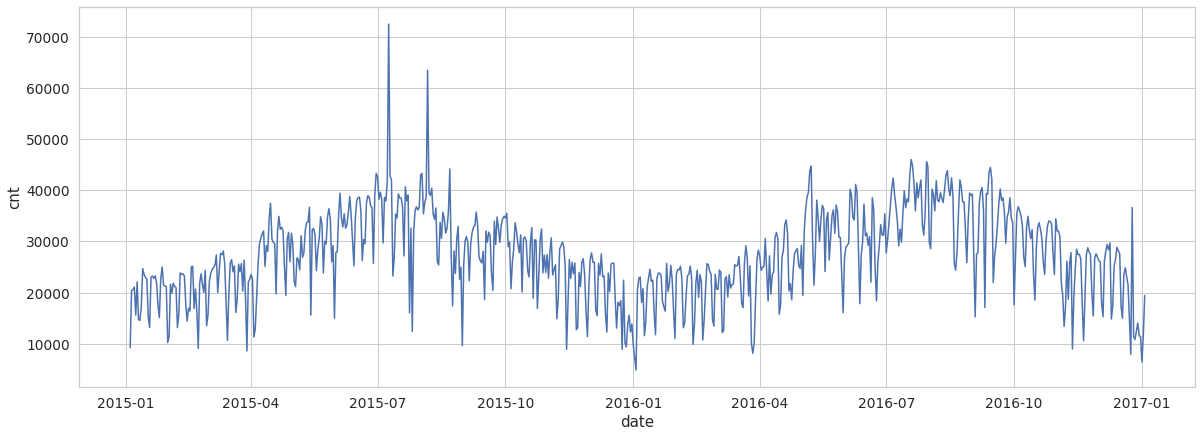

In [12]:
sns.set(
    font_scale =1.25,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)
df['date'] = pd.to_datetime(df['timestamp'].apply(lambda x : str(x)[:-9]))
data = df.groupby(["date"], as_index=False).agg({'cnt' : 'sum'})
sns.lineplot(x=data.date, y=data.cnt)

**Задание 3**

Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:

* data.resample(rule='D').column_name.sum() #способ 1
* data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему


Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [13]:
# data.resample(rule='D').column_name.sum() #способ 1
# data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему

In [14]:
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04


In [15]:
df_series = \
    df.set_index('timestamp') \
        .sort_values("timestamp") \
        .resample(rule='D') \
        .cnt.sum()

In [16]:
df_series

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

In [17]:
data

,date,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [18]:
# The same thing

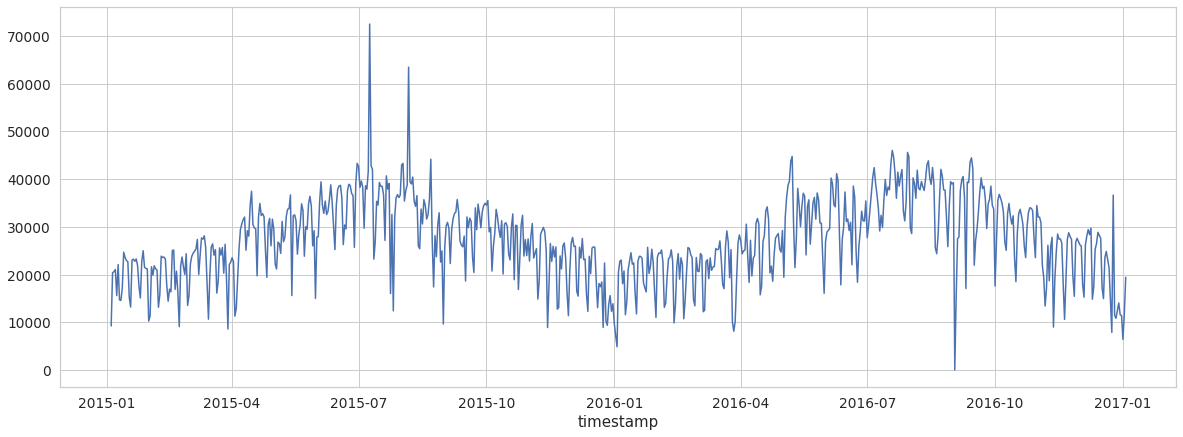

In [19]:
sns.lineplot(x=df_series.index, y=df_series.values)

* Зимой число аренд меньше, чем летом
* Максимальное число аренд за день составляет более 70 000
* Встречаются как очень резкие скачки числа аренд, так и падения

**Задание 4**

Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в те дни - и насколько эти изменения для нас неожиданны 🤔. Для этого мы попробуем построить доверительный интервал вокруг данных - всё, что выпадает за его пределы, будет считаться аномалией, и на отдельные из них мы потом и посмотрим.

Однако не всё так просто. Мы сейчас работаем с временным рядом - последовательностью значений, меняющейся во времени. Мы не можем просто так посчитать доверительный интервал для всего: так мы можем упустить важные характеристики данных! Например, сезонные колебания. 

Чтобы учесть этот момент, мы построим доверительный интервал, используя скользящее среднее. Для этого разделим дальнейшие действия на несколько этапов:

* сначала посчитаем скользящее среднее, чтобы сгладить ряд
* далее – разницу между наблюдаемыми и сглаженными значениями
* определим верхние и нижние границы 99% доверительного интервала 
* найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [20]:
(20372+20372 +21064) / 3

20602.666666666668

In [21]:
df_series

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

In [22]:
df_series_rolling = df_series.rolling(window=3).mean()

In [23]:
df_series_rolling

timestamp
2015-01-04             NaN
2015-01-05             NaN
2015-01-06    16739.666667
2015-01-07    20683.000000
2015-01-08    19092.666667
                  ...     
2016-12-30    12682.000000
2016-12-31    12347.333333
2017-01-01     9803.666667
2017-01-02     9889.333333
2017-01-03    12560.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

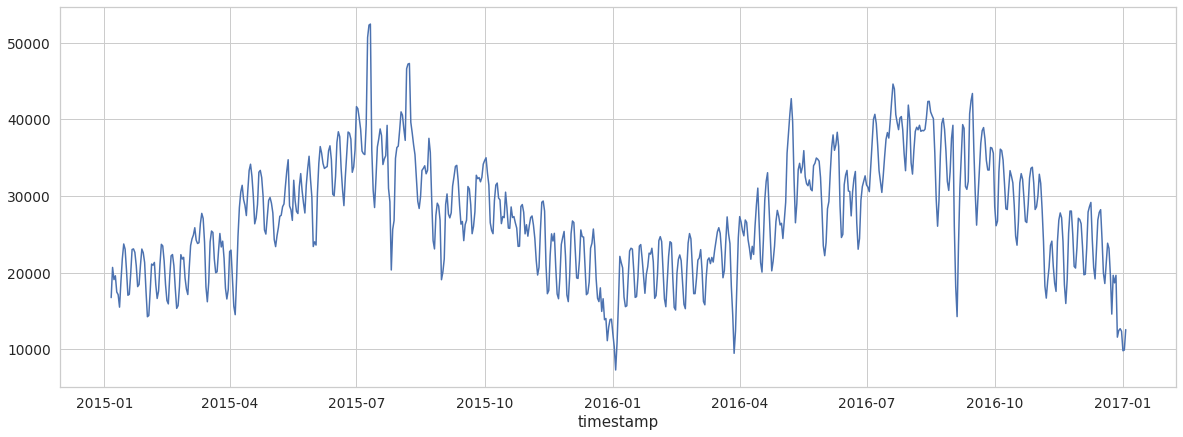

In [24]:
sns.lineplot(x=df_series_rolling.index, y=df_series_rolling.values)

In [25]:
#### Start again

In [26]:
df_series_rolling['2015-07-09']

50705.0

**Задание 5**

Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:

* c = a - b
* std = np.std(c)


В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

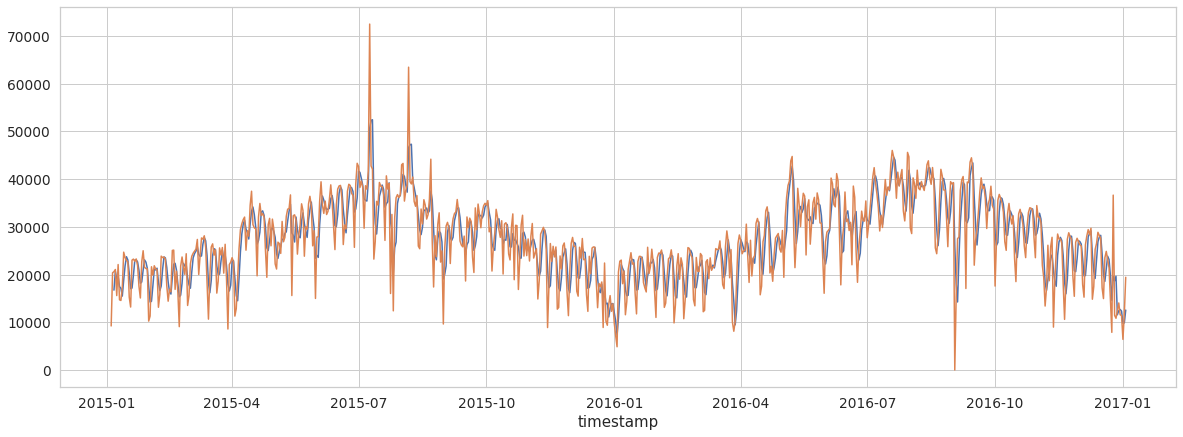

In [27]:
sns.lineplot(x=df_series_rolling.index, y=df_series_rolling.values)
sns.lineplot(x=df_series.index, y=df_series.values)

In [28]:
# df_series

In [29]:
# df_series_rolling

In [30]:
diff = df_series - df_series_rolling

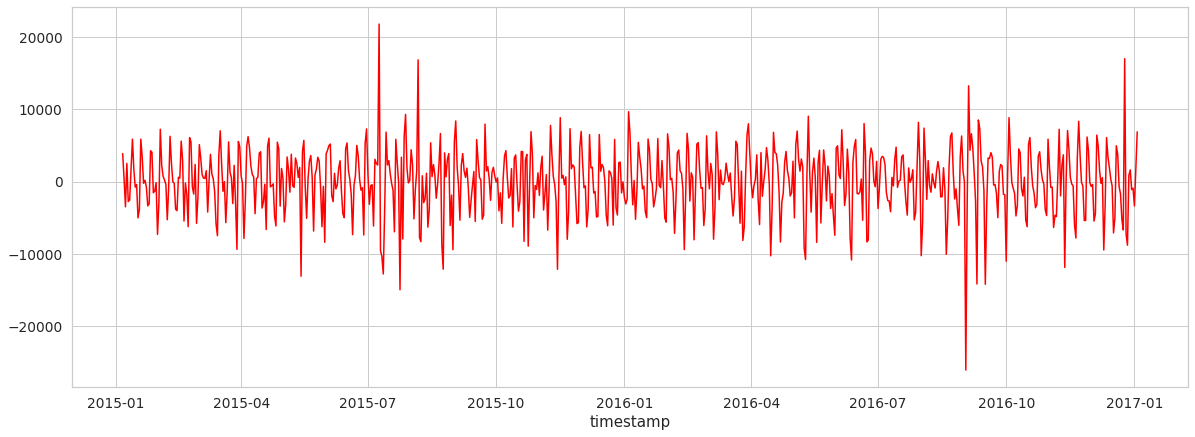

In [31]:
sns.lineplot(x=diff.index, y=diff.values, color='red')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


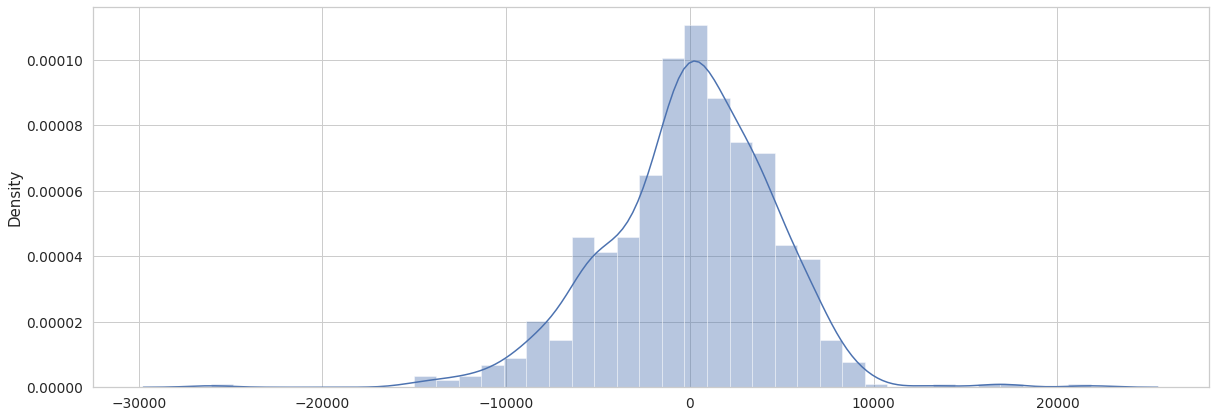

In [32]:
sns.distplot(diff.values)

In [33]:
diff.values[2:].mean()

0.327846364883347

In [34]:
sd = np.std(diff)
sd

4558.58664111794

In [35]:
round(sd, 2)

4558.59

**Задание 6**

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
lower_bound – нижняя граница; вычитаем 2.576∗std
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().



In [36]:
df_agg = pd.DataFrame({'count' : df_series, 'count_rolled' : df_series_rolling}).reset_index()
df_agg

,timestamp,count,count_rolled
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


In [37]:
upper_bound = df_series_rolling + 2.576 * sd
lower_bound = df_series_rolling - 2.576 * sd

df_agg['upper_bound'] = upper_bound.values
df_agg['lower_bound'] = lower_bound.values

df_agg.head(10)

,timestamp,count,count_rolled,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,30835.585854,7349.747479
5,2015-01-09,22104,19589.666667,31332.585854,7846.747479
6,2015-01-10,14709,17471.333333,29214.252521,5728.414146
7,2015-01-11,14575,17129.333333,28872.252521,5386.414146
8,2015-01-12,17199,15494.333333,27237.252521,3751.414146
9,2015-01-13,24697,18823.666667,30566.585854,7080.747479


In [38]:
round(df_agg.tail().upper_bound[730],2)

24302.92

**Задание 7**

И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [39]:
df_agg[df_agg['count'] > df_agg['upper_bound']]

,timestamp,count,count_rolled,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,31393.585854,7907.747479


In [40]:
df_agg[df_agg['count'] > df_agg['upper_bound']].sort_values(['count'], ascending=False).head(1)

,timestamp,count,count_rolled,upper_bound,lower_bound
186,2015-07-09,72504,50705.0,62447.919188,38962.080812


In [41]:
df_agg[df_agg['count'] > df_agg['upper_bound']].sort_values(['count'], ascending=False).head(1).timestamp

186   2015-07-09
Name: timestamp, dtype: datetime64[ns]

**Задание 8**

Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

В качестве ответа выберите наиболее вероятную причину столь резкого скачка:

In [42]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04


In [43]:
# df[df['date'] == '2015-07-09']

In [44]:
# df_anomaly_days = df.query("date == '2015-07-09' or date == '2015-08-06' or date == '2016-09-04' or date == '2016-12-25'")

In [45]:
# df_anomaly_days

In [46]:
# df_anomaly_days.groupby(["date"], as_index=False) \
#     .agg({
#             't1' : 'mean',
#             't2' : 'mean',
#             'hum' : 'mean',
#             'wind_speed' : 'mean',
#             'is_holiday' : 'mean'
#     }) \
#     .agg({'t1':'mean', 't2':'mean', 'hum' : 'mean', 'is_holiday' : 'mean', 'wind_speed' : 'mean'})

In [47]:
# df_NOT_anomaly_days = df.query("date != '2015-07-09' or date != '2015-08-06' or date != '2016-09-04' or date != '2016-12-25'")

In [48]:
# df_NOT_anomaly_days.groupby(["date"], as_index=False) \
#     .agg({
#             't1' : 'mean',
#             't2' : 'mean',
#             'hum' : 'mean',
#             'wind_speed' : 'mean',
#             'is_holiday' : 'mean'
#     })\
#     .agg({'t1':'mean', 't2':'mean', 'hum' : 'mean', 'is_holiday' : 'mean', 'wind_speed' : 'mean'})

**Задание 9**

Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?

In [49]:
df_agg[df_agg['count'] < df_agg['lower_bound']].sort_values(['count'])

,timestamp,count,count_rolled,upper_bound,lower_bound
607,2016-09-02,0,26086.333333,37829.252521,14343.414146
314,2015-11-14,8898,21037.333333,32780.252521,9294.414146
678,2016-11-12,8990,20878.000000,32620.919188,9135.080812
130,2015-05-14,15609,28709.333333,40452.252521,16966.414146
201,2015-07-24,16034,31013.666667,42756.585854,19270.747479
615,2016-09-10,17080,31262.000000,43004.919188,19519.080812
232,2015-08-24,17400,29529.333333,41272.252521,17786.414146
621,2016-09-16,21967,36193.333333,47936.252521,24450.414146
189,2015-07-12,23240,36036.666667,47779.585854,24293.747479


In [50]:
# df[df['date'] == '2016-09-02']

In [51]:
# df.iloc[607]

In [52]:
# df.query("date == '2016-09-02'")

In [53]:
# new_df = pd.read_csv('london.csv')

In [54]:
# new_df['timestamp'] = pd.to_datetime(new_df['timestamp']).dt.date

In [55]:
# new_df[new_df['timestamp'] == '2016-09-02']

In [56]:
# new_df[14470:14480]

In [57]:
# sns.boxplot(x=df_series.values)

In [58]:
# sns.distplot(df_series.values)
# sns.distplot(df_series_rolling.values)

In [59]:
new_df = pd.DataFrame(df_series).reset_index()
# new_df

In [66]:
rolling_data = pd.DataFrame(df_series_rolling).reset_index()

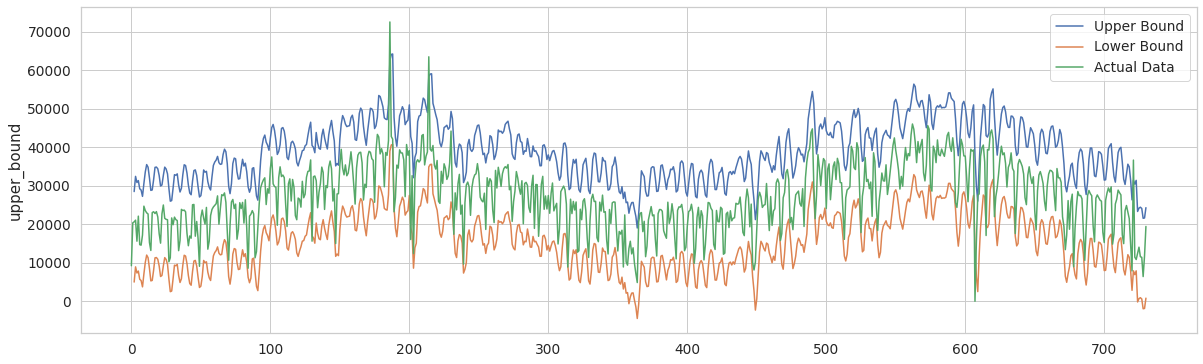

In [60]:
sns.set(
    font_scale =1.25,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,6)}
)

sns.lineplot(x=df_agg.index, y=df_agg.upper_bound, label='Upper Bound')
sns.lineplot(x=df_agg.index, y=df_agg.lower_bound, label='Lower Bound')
sns.lineplot(x=new_df.index, y=new_df.cnt, label='Actual Data')

In [61]:
upper_anomaly = df_agg[df_agg['count'] > df_agg['upper_bound']]
# upper_anomaly

In [62]:
lower_anomaly = df_agg[df_agg['count'] < df_agg['lower_bound']].sort_values(['count'])
# lower_anomaly

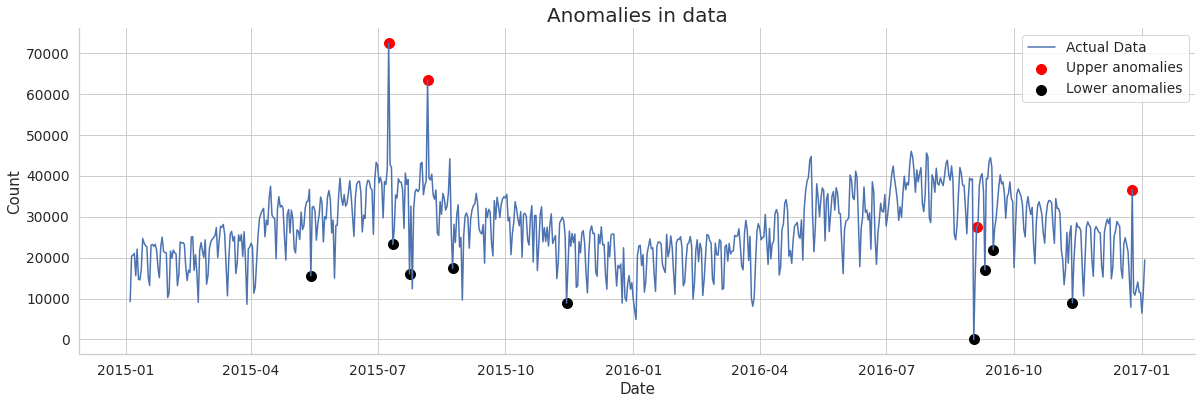

In [71]:
# sns.lineplot(x=df_agg.timestamp, y=df_agg.upper_bound, label='Upper Bound')
# sns.lineplot(x=df_agg.timestamp, y=df_agg.lower_bound, label='Lower Bound')
# sns.lineplot(x=rolling_data.timestamp, y=rolling_data.cnt, label='Rolling')
sns.lineplot(x=new_df.timestamp, y=new_df.cnt, label='Actual Data')

plt.scatter(x=upper_anomaly.timestamp, y=upper_anomaly['count'], color='red', s=100, label='Upper anomalies')
plt.scatter(x=lower_anomaly.timestamp, y=lower_anomaly['count'], color='black', s=100, label='Lower anomalies')
plt.title("Anomalies in data", size=20)
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
sns.despine()

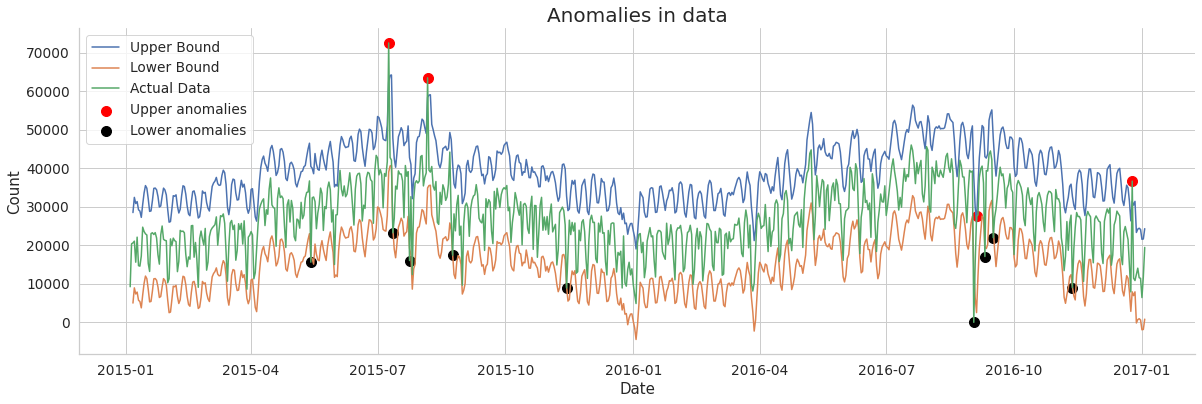

In [72]:
sns.lineplot(x=df_agg.timestamp, y=df_agg.upper_bound, label='Upper Bound')
sns.lineplot(x=df_agg.timestamp, y=df_agg.lower_bound, label='Lower Bound')
# sns.lineplot(x=rolling_data.timestamp, y=rolling_data.cnt, label='Rolling')
sns.lineplot(x=new_df.timestamp, y=new_df.cnt, label='Actual Data')

plt.scatter(x=upper_anomaly.timestamp, y=upper_anomaly['count'], color='red', s=100, label='Upper anomalies')
plt.scatter(x=lower_anomaly.timestamp, y=lower_anomaly['count'], color='black', s=100, label='Lower anomalies')
plt.title("Anomalies in data", size=20)
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
sns.despine()